# Similarity - Bag of words - binary

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance
from sklearn.metrics.pairwise import pairwise_distances

### ENG

In [6]:
df = pd.read_csv('../CSV/songs_bow_bin.csv', header=0)
print(df.shape)
df.head()

(185, 1327)


,abandoned,abba,abides,able,abraham,abrahams,absorb,abundant,abyss,accelerate,...,wrong,years,you,youll,your,yours,yourself,youth,zion,zither
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df2 = pd.read_csv('../CSV/gospel_bow_bin.csv', header=0)
print(df2.shape)
df2.head()

(128, 1327)


,abandoned,abba,abides,able,abraham,abrahams,absorb,abundant,abyss,accelerate,...,wrong,years,you,youll,your,yours,yourself,youth,zion,zither
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Cosine similarity

In [9]:
sim = cosine_similarity(df, df2)

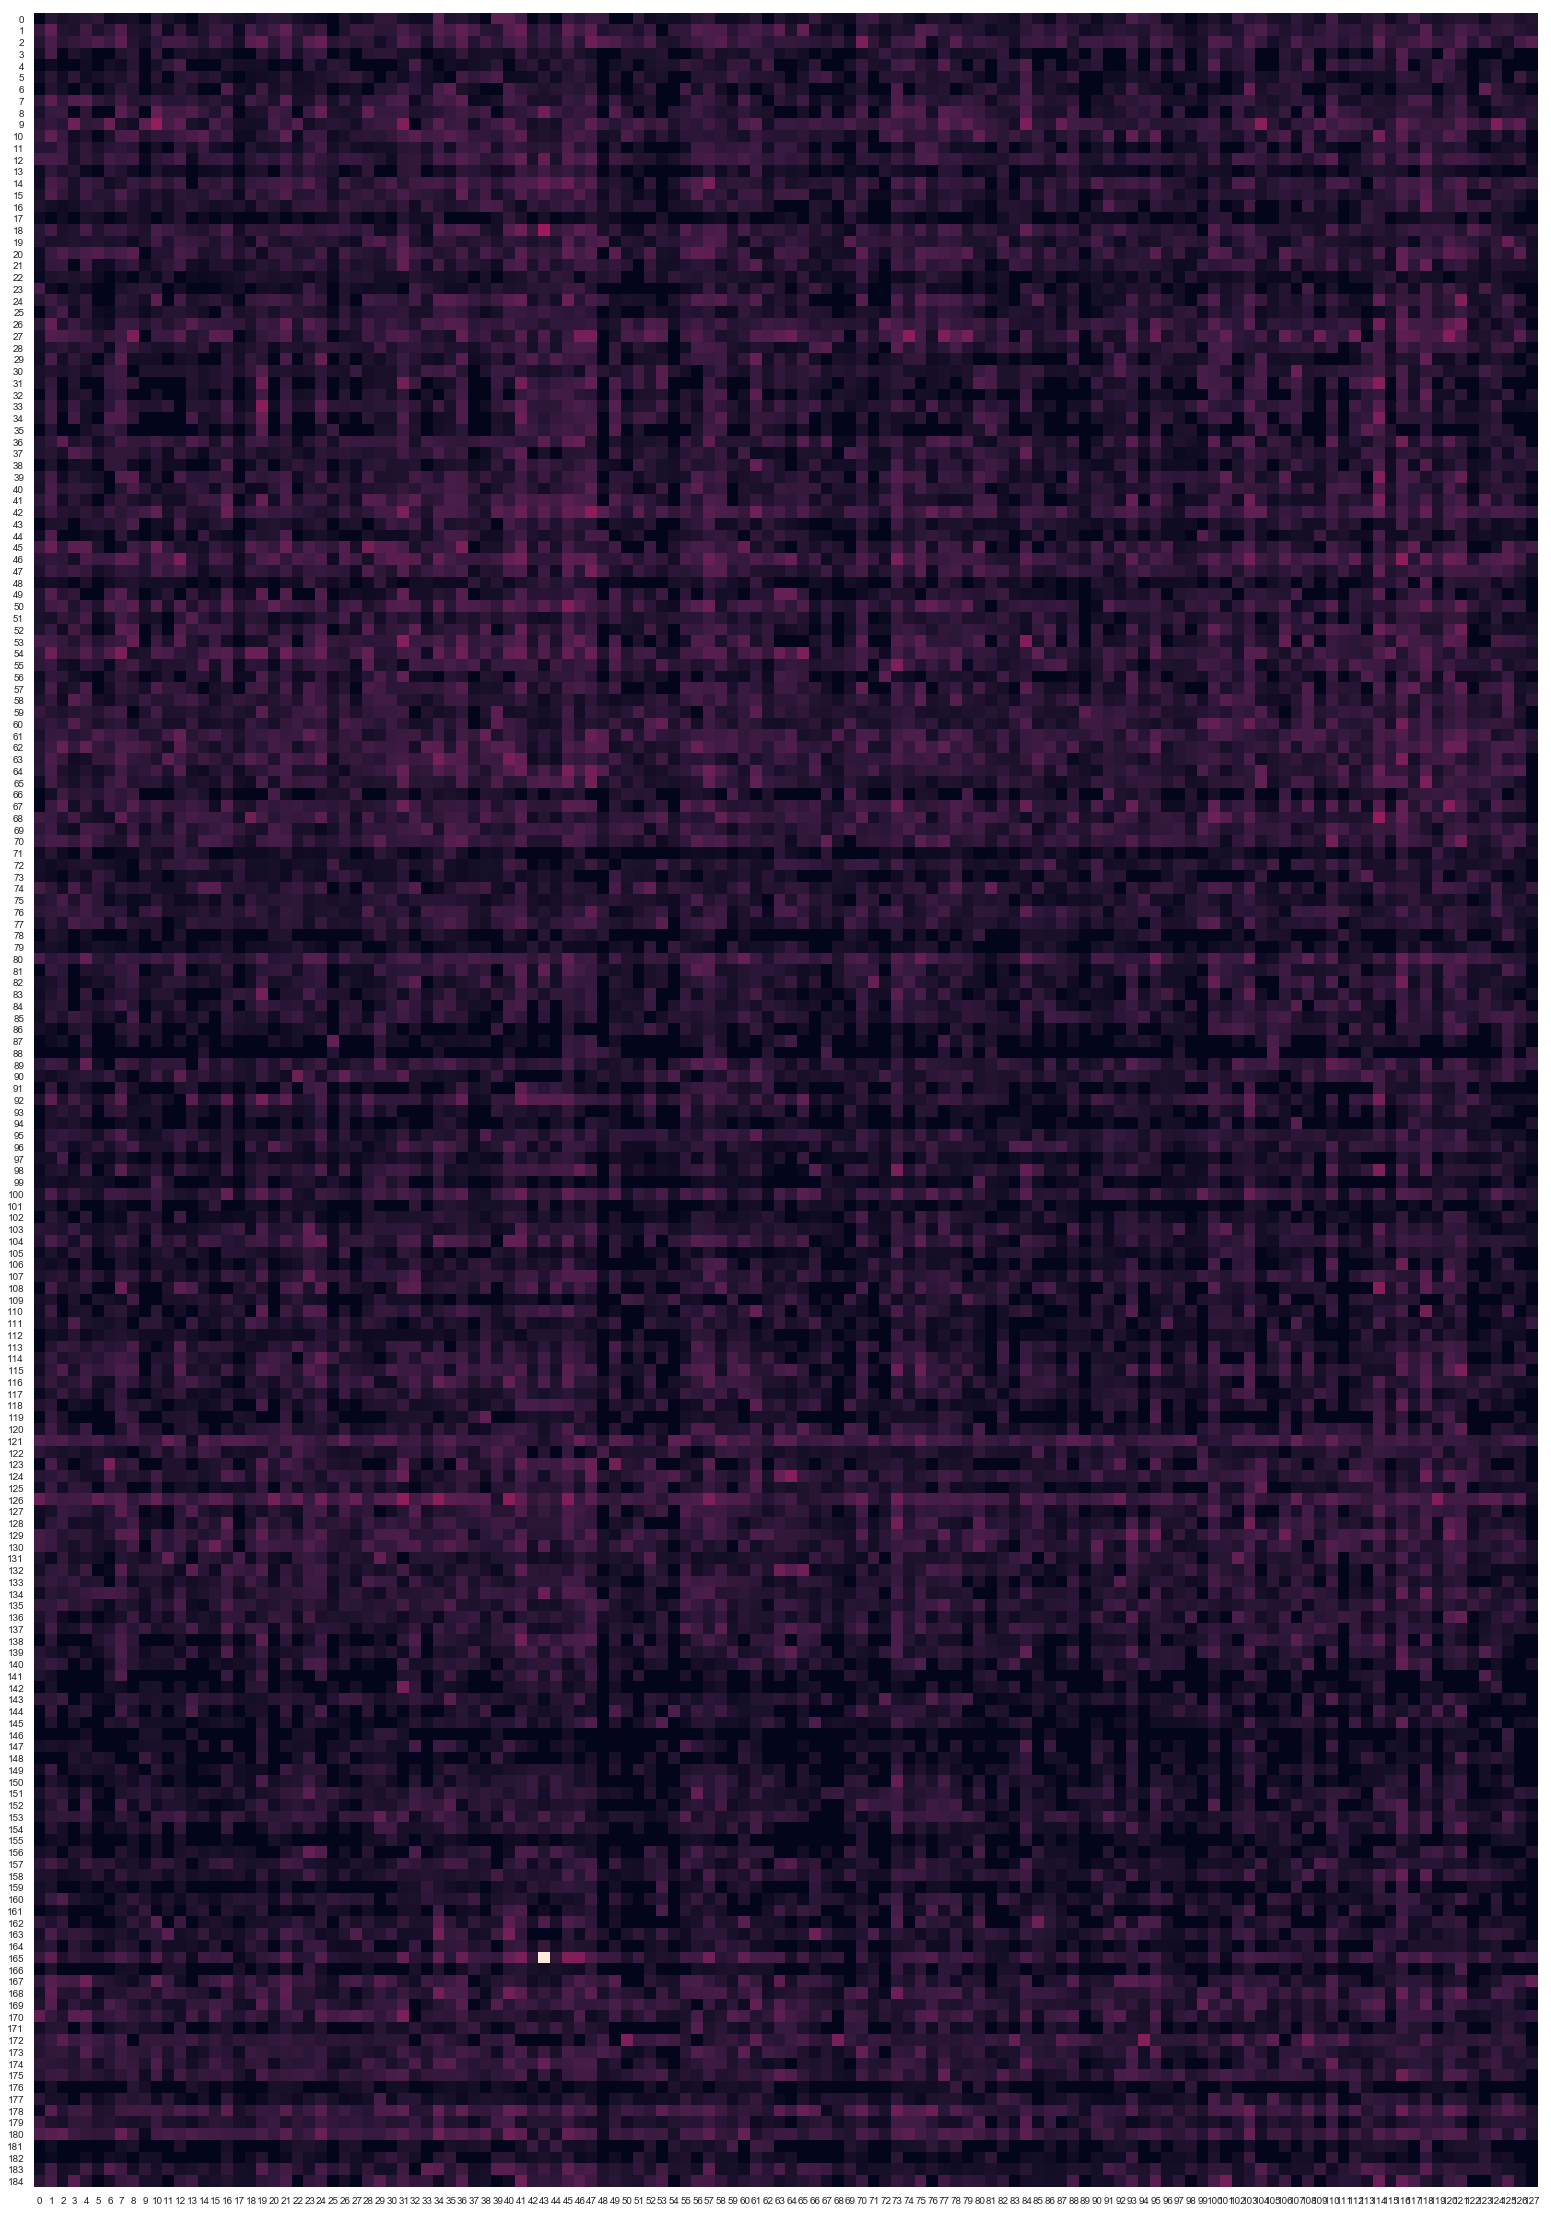

In [19]:
plt.figure(figsize=(60,40))
sns.set(font_scale=0.9)
sns.heatmap(sim, cbar=False, annot=False, #xticklabels= titles, 
            #yticklabels = titles, 
            square=True,
          # linewidths=.01
           )
plt.xticks(rotation=0) 
plt.show()

#### Check

In [32]:
df_s = pd.read_csv('../CSV/piosenki_pl_en.csv', header=0)
df_r = pd.read_csv('../CSV/df_eng_gospel.csv', header=0)

In [37]:
print(df_s.iloc[165]['en'])
print()
print(df_r.iloc[43]['Ewangelia'])

The soul of my Lord worships and my spirit rejoices in God, my Savior. Because he looked at the humiliation of his handmaid, for here, from now on, all generations will bless me. For the Almighty has done great things for me, and His name is holy. His mercy from generation to generation over those who fear Him. He showed the power of his arm, dispersed his heart-boiling thoughts. He put down the rulers from the throne and exalted the humble. He filled the hungry with good things, and sent the rich away with nothing. He took charge of his servant, Israel, mindful of his mercy. As he promised our fathers, Abraham and his offspring forever. Glory be to the Father and to the Son and to the Holy Spirit As at the beginning, now and always and for ever and ever Amen.

At that time, Mary said, "My soul magnifates the Lord, and my spirit rejoices in God, my Savior. For he looked on the humiliation of his handmaid, for from now on all generations will bless me. For the Almighty has done great th

In [23]:
df_sim = pd.DataFrame(sim)

In [38]:
df_sim.max().max()

0.8412698412698412

### Jaccard similarity

In [42]:
def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    print(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection / union)

In [43]:
jaccard_similarity(df.iloc[165], df2.iloc[43])

[0, 1]


0.0007541478129713424

In [45]:
distance.jaccard(df.iloc[165], df2.iloc[43])

0.273972602739726

In [55]:

jac_sim = 1 - pairwise_distances(df, df2, metric = "jaccard")
# optionally convert it to a DataFrame
#jac_sim = pd.DataFrame(jac_sim, index=df.columns, columns=df.columns)

F:\ProgramData\Anaconda3\envs\NLP\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)
F:\ProgramData\Anaconda3\envs\NLP\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


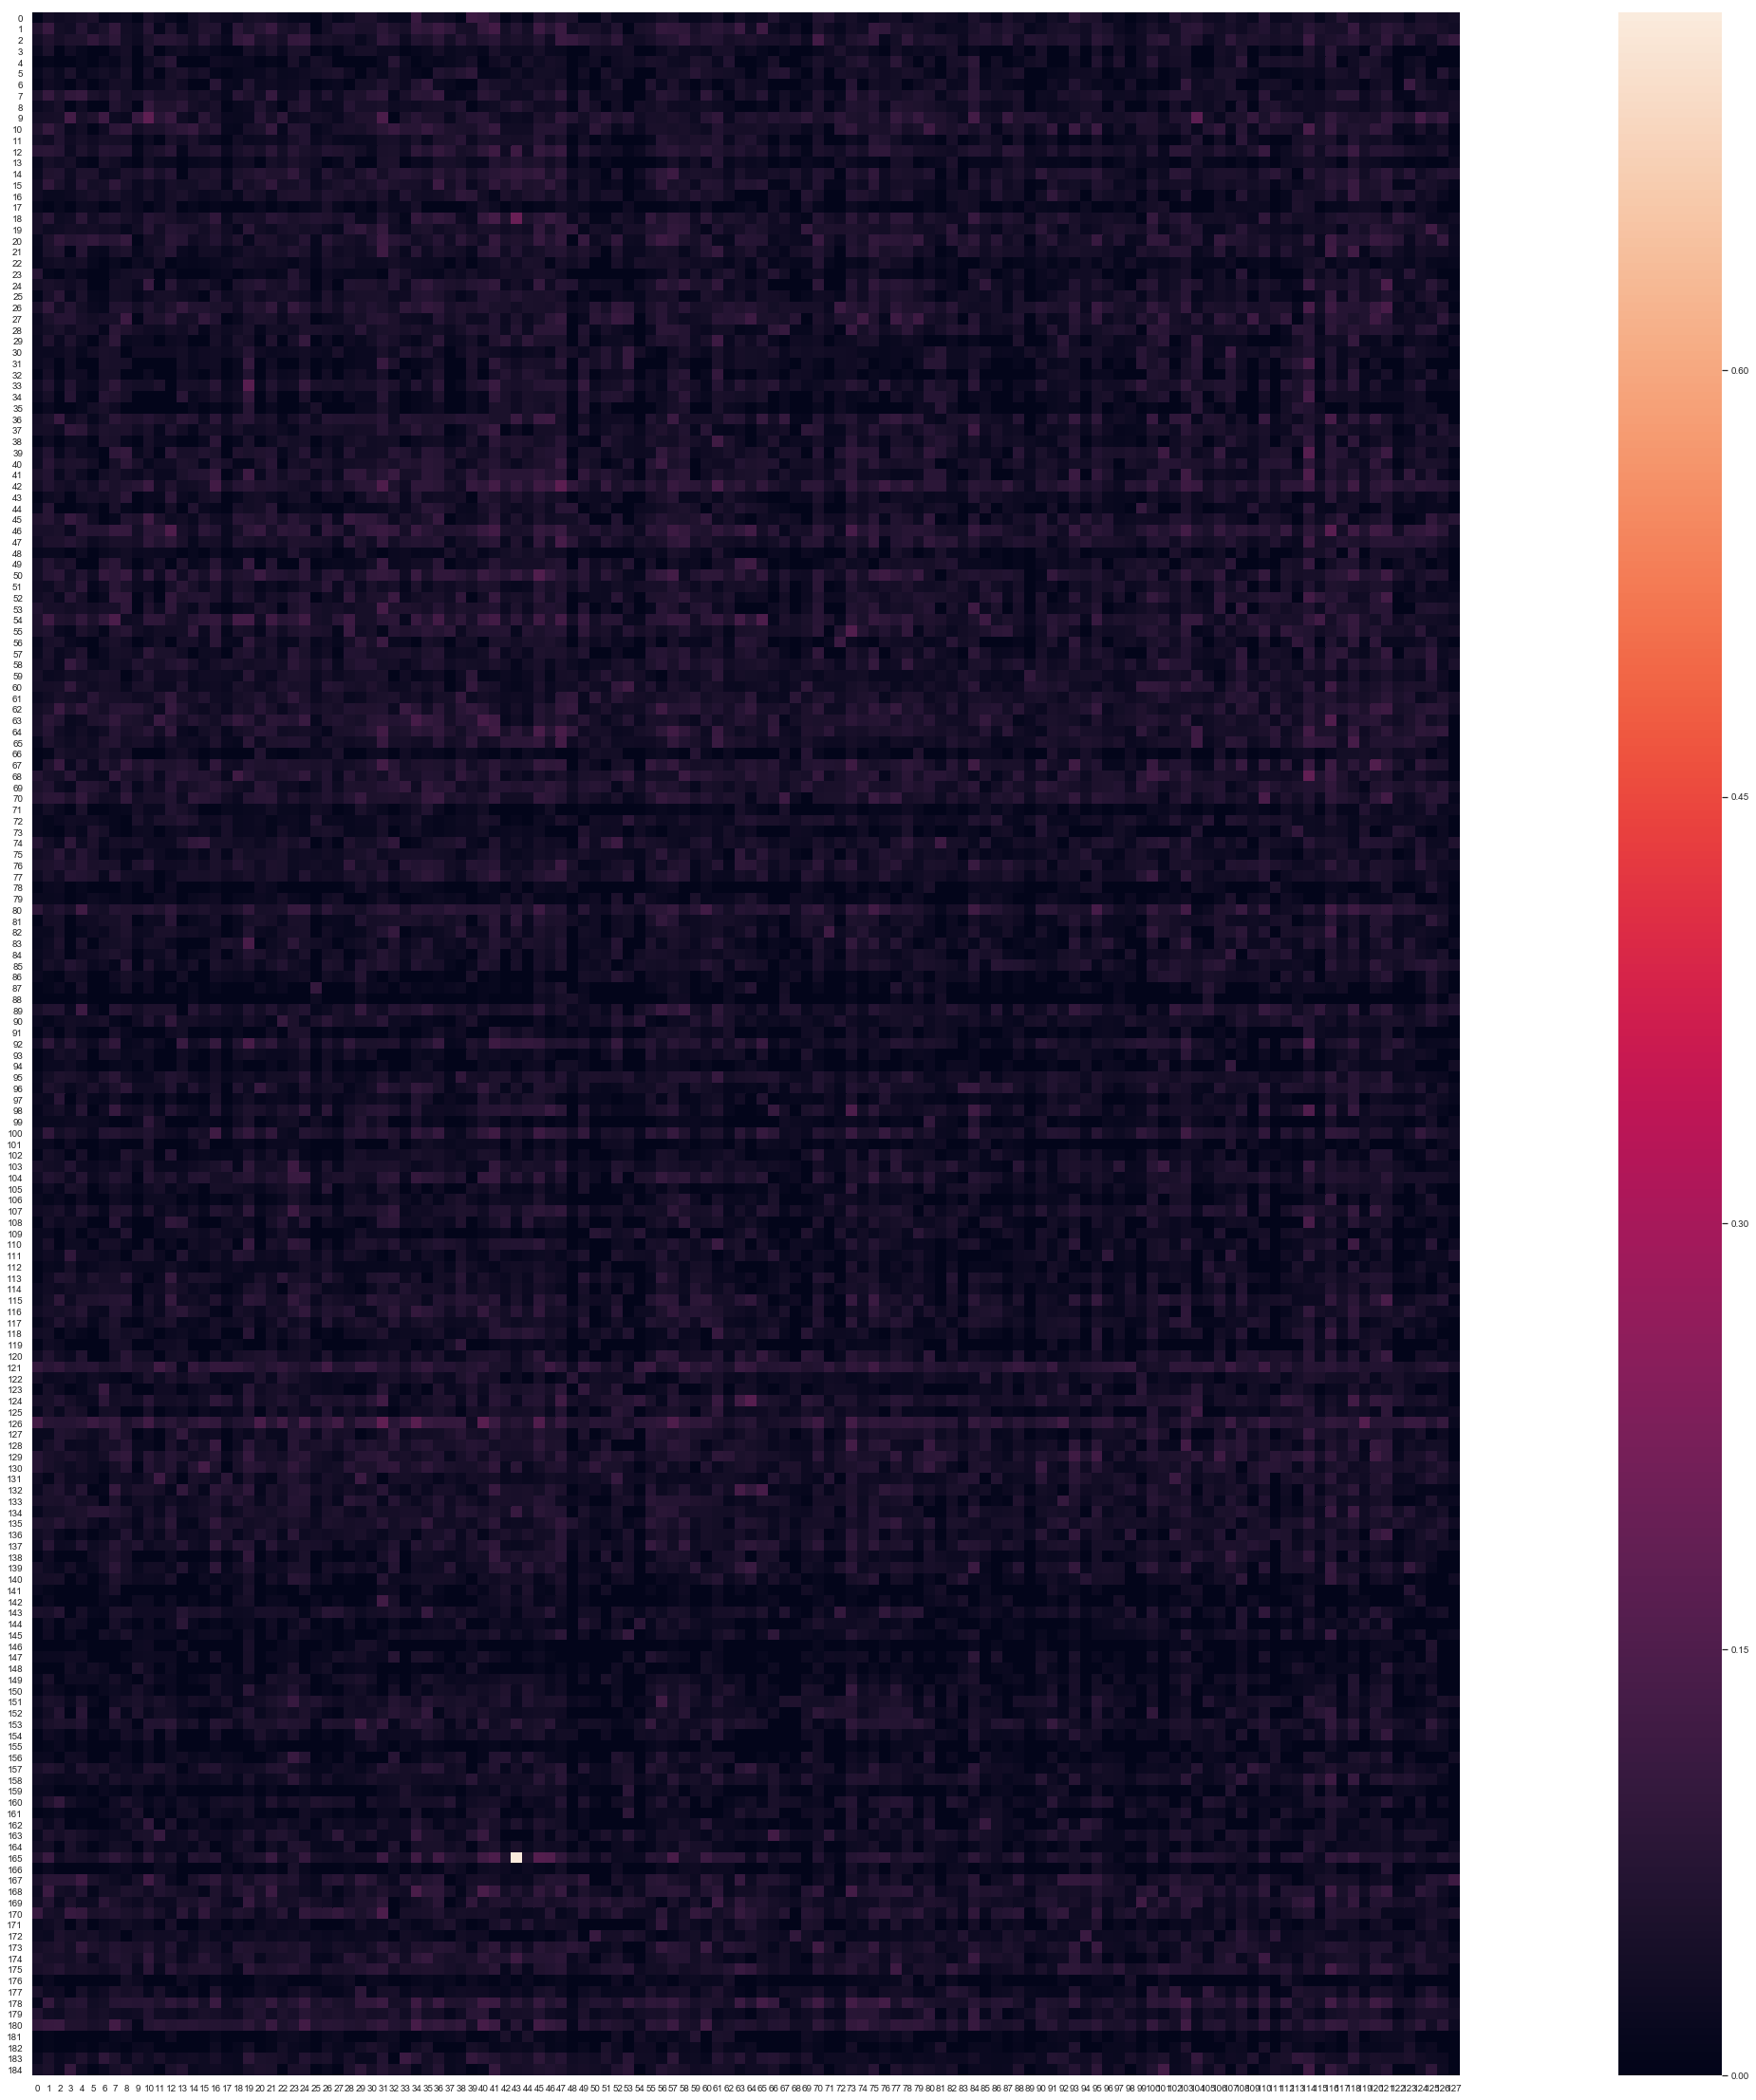

In [56]:
plt.figure(figsize=(60,40))
sns.set(font_scale=0.9)
sns.heatmap(jac_sim, cbar=True, annot=False, #xticklabels= titles, 
            #yticklabels = titles, 
            square=True,
          # linewidths=.01
           )
plt.xticks(rotation=0) 
plt.show()

### PL

In [3]:
df = pd.read_csv('../CSV/piosenki_bow_bin_pl_lem.csv', header=0)
print(df.shape)
df.head()

(186, 1310)


,abba,abraham,adonai,alleluja,amen,amor,anioł,archanioł,ave,ażebym,...,żeś,żeśmy,życie,życiodajny,żywioła,żywić,żywot,żywy,żyć,żyła
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
df2 = pd.read_csv('../CSV/czytania_bow_bin_pl_lem.csv', header=0)
print(df2.shape)
df2.head()

(87, 1310)


,abba,abraham,adonai,alleluja,amen,amor,anioł,archanioł,ave,ażebym,...,żeś,żeśmy,życie,życiodajny,żywioła,żywić,żywot,żywy,żyć,żyła
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Cosinus similarity

In [8]:
sim_pl = cosine_similarity(df, df2)

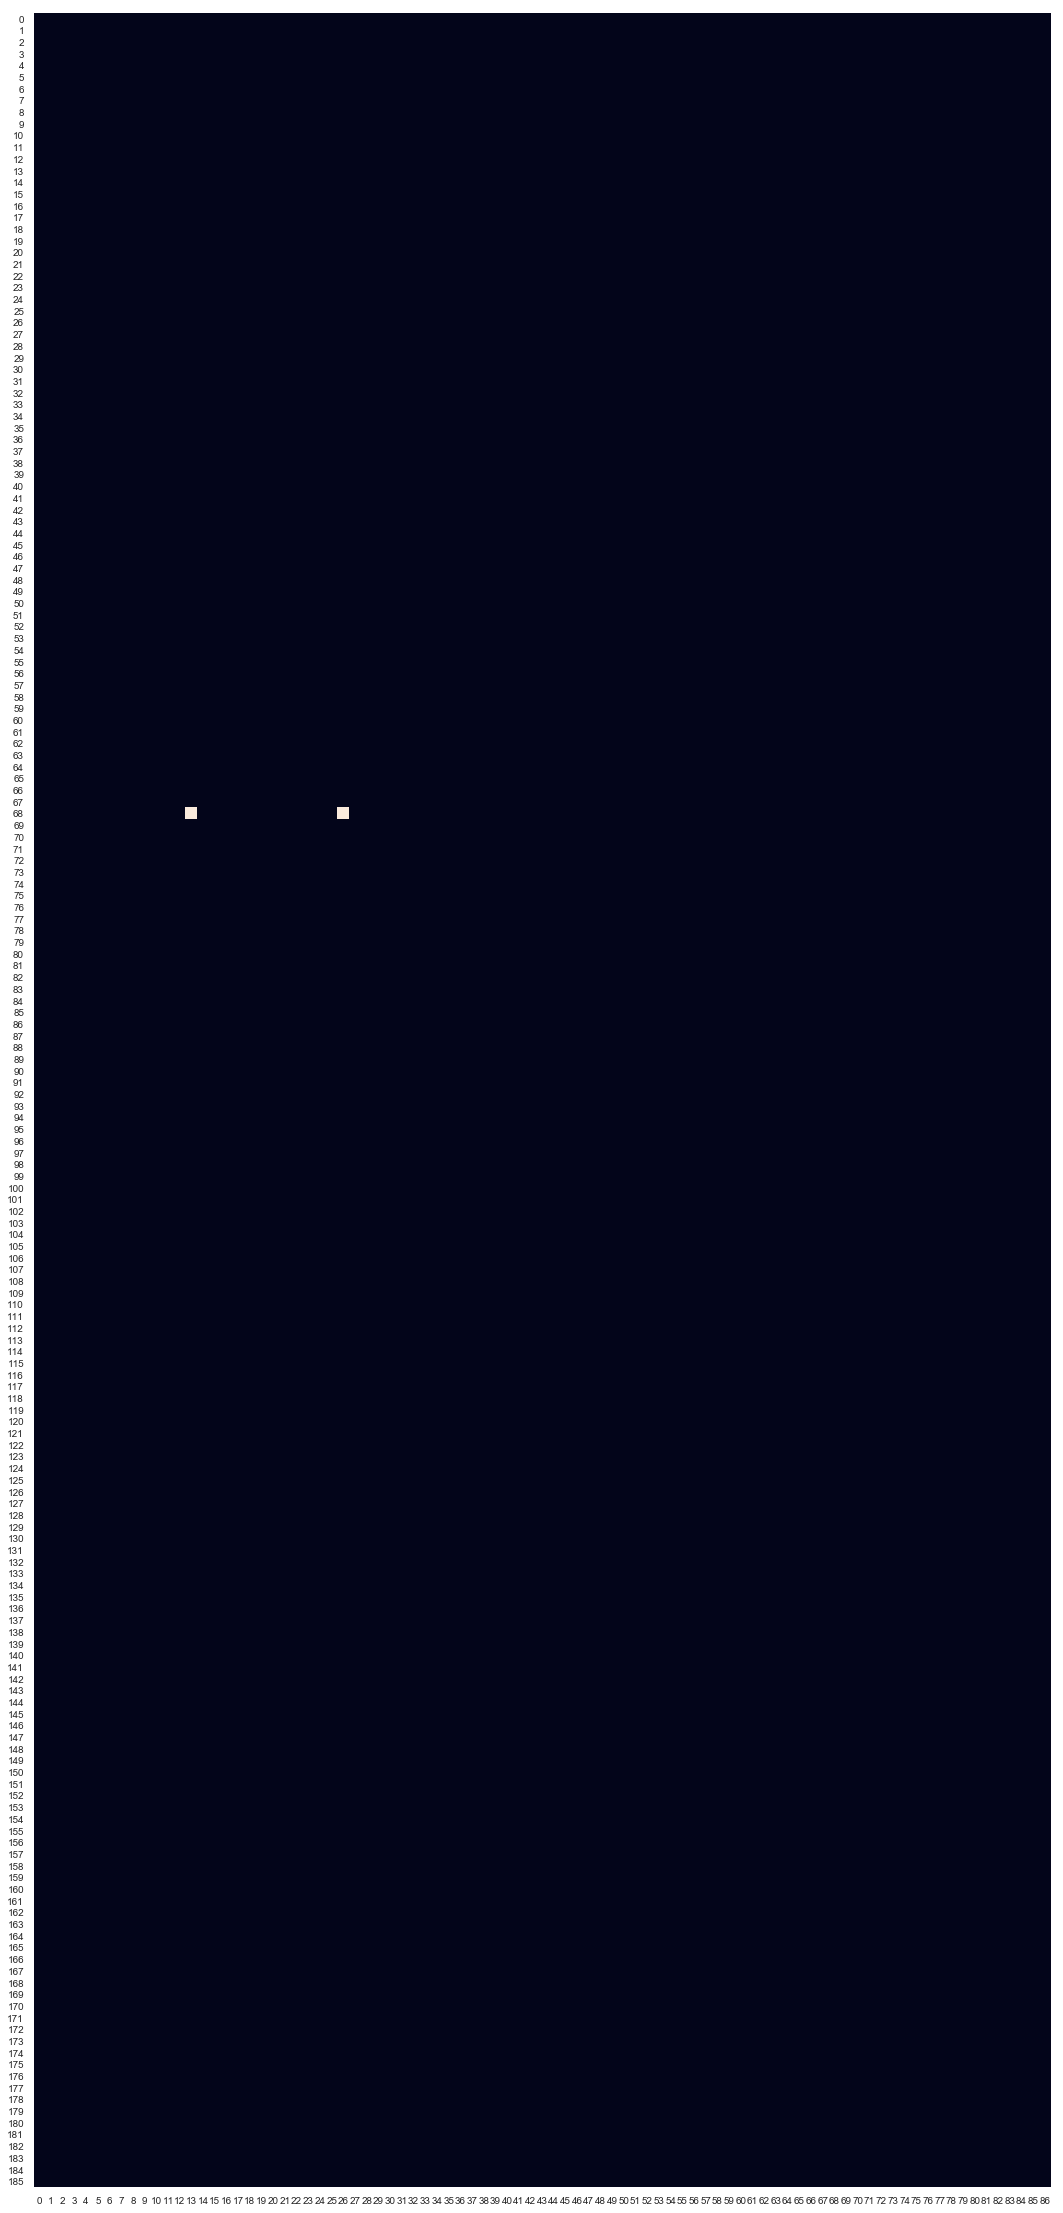

In [15]:
plt.figure(figsize=(60,40))
sns.set(font_scale=0.9)
sns.heatmap(sim_pl >= 0.5, cbar=False, annot=False, #xticklabels= titles, 
            #yticklabels = titles, 
            square=True,
          # linewidths=.01
           )
plt.xticks(rotation=0) 
plt.show()

### Jaccard index

In [13]:
jac_sim = 1 - pairwise_distances(df, df2, metric = "jaccard")

F:\ProgramData\Anaconda3\envs\NLP\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)
F:\ProgramData\Anaconda3\envs\NLP\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


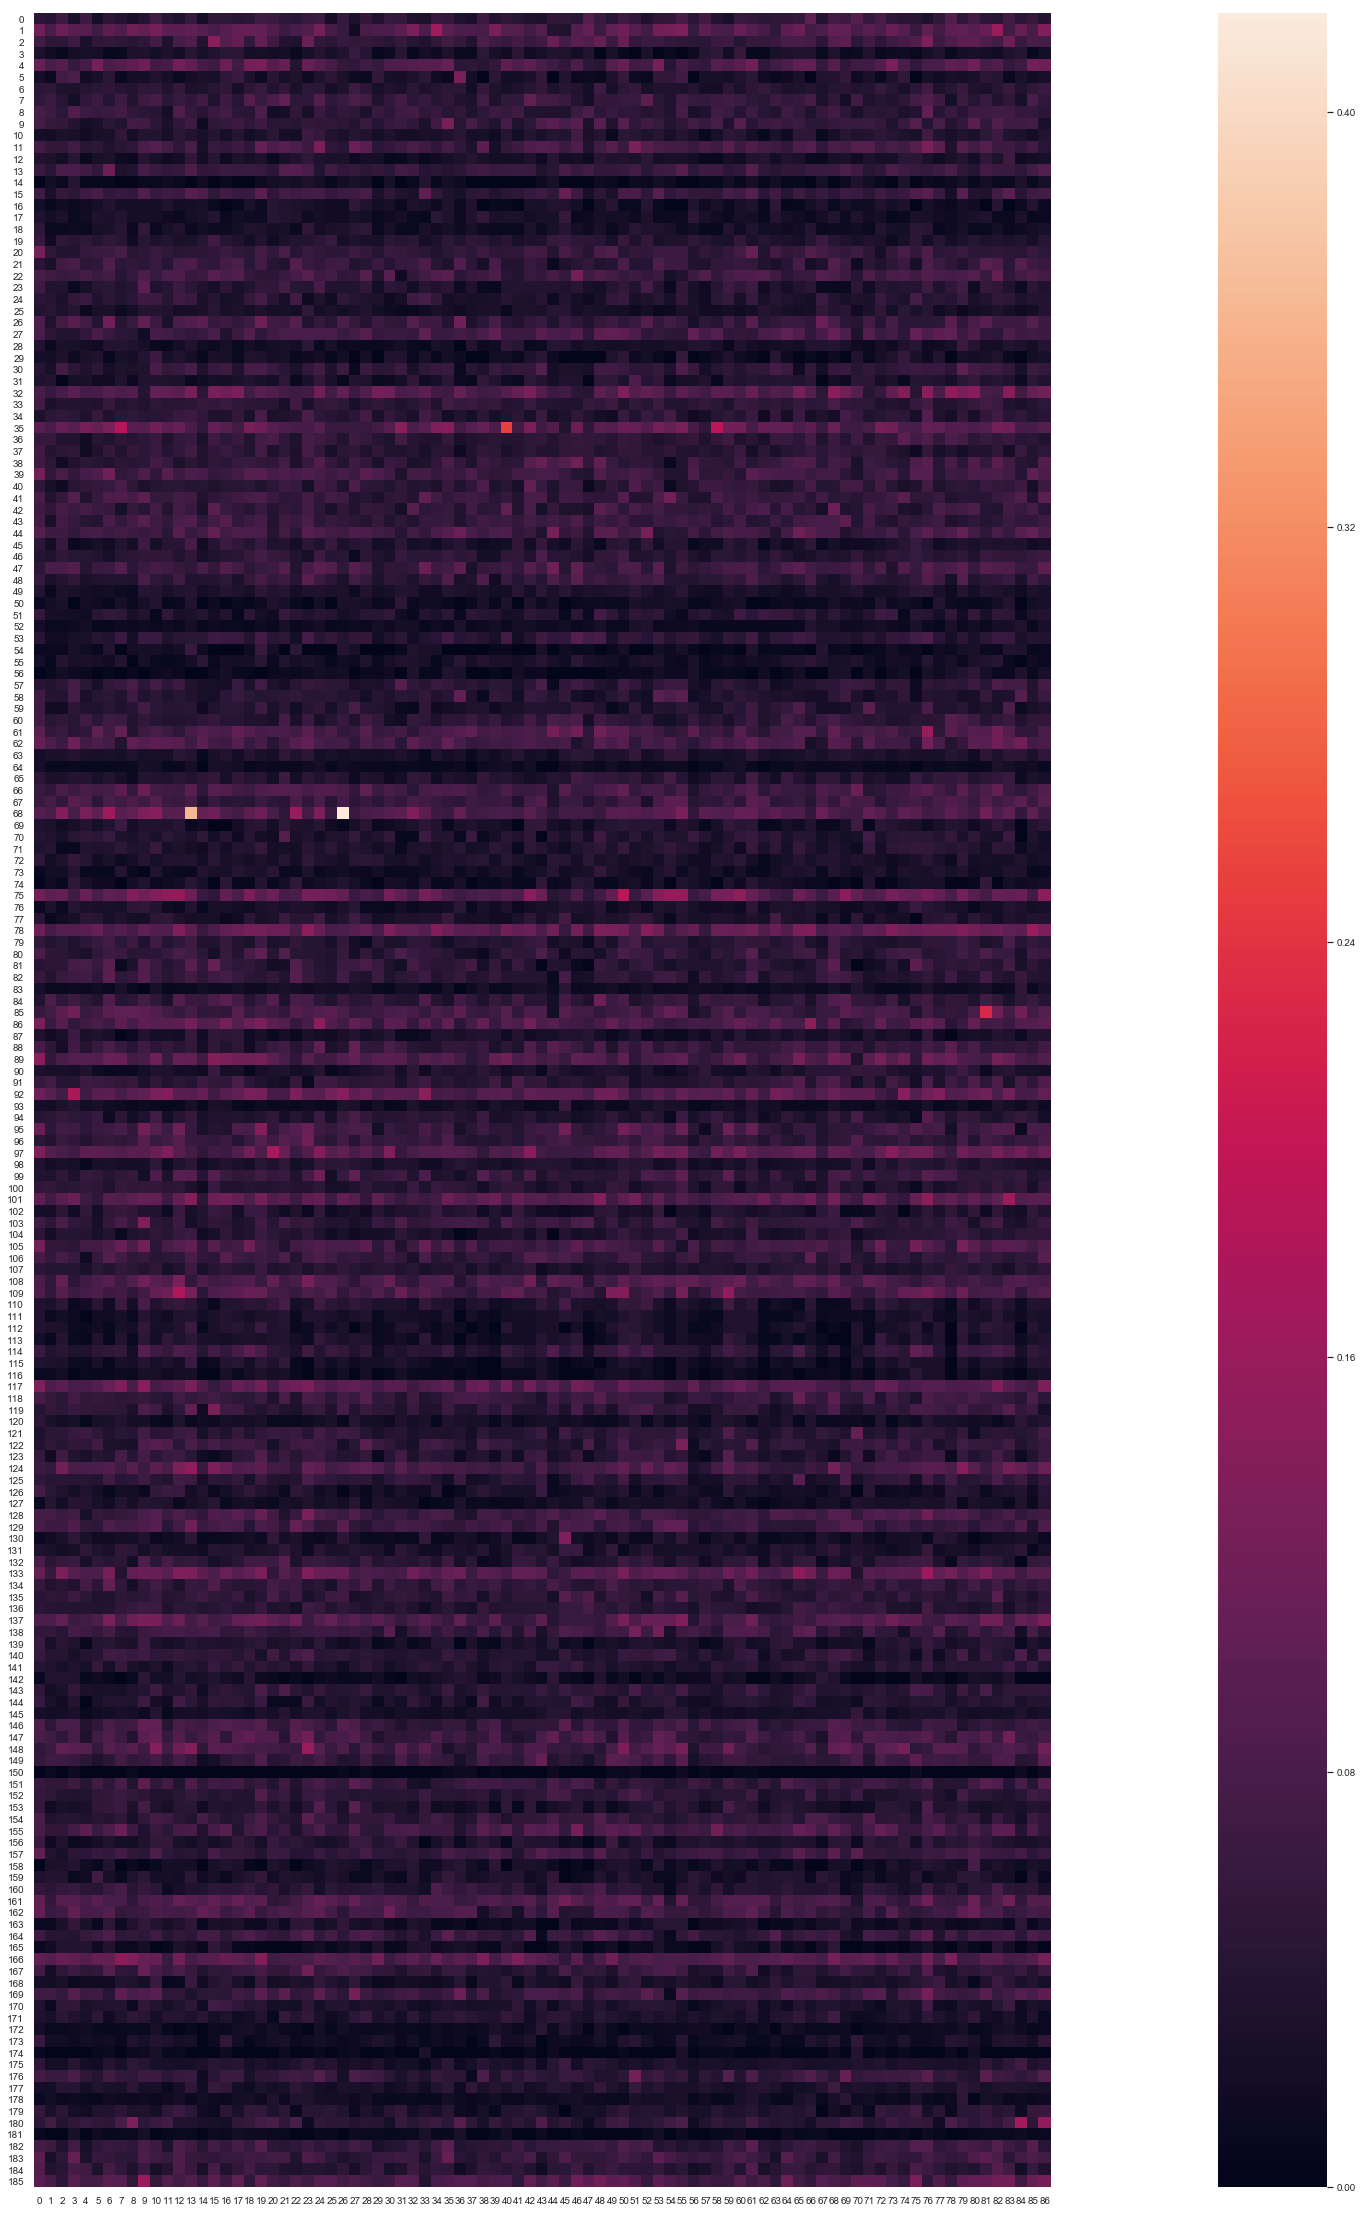

In [14]:
plt.figure(figsize=(60,40))
sns.set(font_scale=0.9)
sns.heatmap(jac_sim, cbar=True, annot=False, #xticklabels= titles, 
            #yticklabels = titles, 
            square=True,
          # linewidths=.01
           )
plt.xticks(rotation=0) 
plt.show()